In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
revenue = pd.read_csv('casestudy.csv')
revenue.head()

,index,customer_email,net_revenue,year
0,0,nhknapwsbx@gmail.com,249.92,2015
1,1,joiuzbvcpn@gmail.com,87.61,2015
2,2,ukkjctepxt@gmail.com,168.38,2015
3,3,gykatilzrt@gmail.com,62.40,2015
4,4,mmsgsrtxah@gmail.com,43.08,2015


In [3]:
revenue.isna().sum()

index             0
customer_email    0
net_revenue       0
year              0
dtype: int64

In [26]:
revenue.describe().T

,count,mean,std,min,25%,50%,75%,max
index,685927.0,342963.000000,198010.213384,0.0,171481.50,342963.00,514444.50,685926.0
net_revenue,685927.0,125.647755,71.854528,1.0,63.51,125.73,187.82,250.0
year,685927.0,2016.027252,0.837203,2015.0,2015.00,2016.00,2017.00,2017.0


• The Current Revenue of 2017 is $31417495

In [4]:
revenue_year = revenue.groupby(["year"])["net_revenue"].sum().reset_index(name ='Total Revenue')
revenue_year

,year,Total Revenue
0,2015,29036749.19
1,2016,25730943.59
2,2017,31417495.03


In [8]:
revenue_year.set_index('year')

,Total Revenue
year,
2015,29036749.19
2016,25730943.59
2017,31417495.03


Text(0.5, 1.0, 'Total Revenue by year')

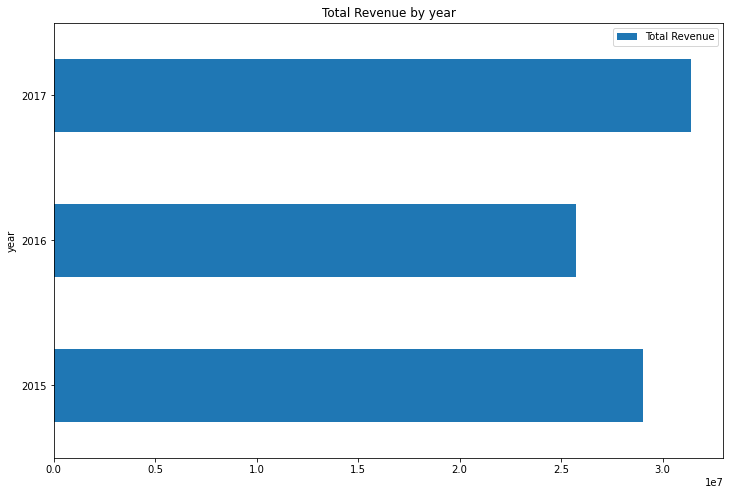

In [24]:
revenue_year.plot(x='year',kind='barh',figsize=(12,8))
plt.title('Total Revenue by year')

• New Customer Revenue = $28776235.03

In [110]:
cust_2017 = revenue[revenue['year']==2017]
cust_2016 = revenue[revenue['year']==2016]
cust_2015 = revenue[revenue['year']==2015]

In [111]:
# New Customer Revenue.
# Identify what values are in cust_2017  and not in cust_2016
customer_diff_2017 = set(cust_2017.customer_email).difference(cust_2016.customer_email)
where_diff_2017 = cust_2017.customer_email.isin(key_diff)

# Slice cust_2017 accordingly 
cust_2017[where_diff_2017]['net_revenue'].sum()

28776235.039999995

• Existing Customer Growth = $12279237.48

In [16]:
#Existing Customer Growth. To calculate this, use the Revenue of existing customers for current year –(minus)
#Revenue of existing customers from the previous year
result = revenue.groupby(['customer_email'])['net_revenue','year'].sum()
result

,net_revenue,year
customer_email,,
aaafxtkgxo@gmail.com,127.62,2016
aaagldjgdt@gmail.com,44.72,2015
aaaglfuvti@gmail.com,160.79,2016
aaaicvtnzx@gmail.com,49.20,2015
aaaiekepot@gmail.com,43.68,2017
...,...,...
zzzoxtrfic@gmail.com,15.74,2017
zzzrjsowtl@gmail.com,95.80,2015
zzztwcvgvp@gmail.com,129.75,2015


In [75]:
result[result['year']==2017]['net_revenue'].sum()-result[result['year']==2016]['net_revenue'].sum()

12279237.48

In [43]:
percent_Growth_17 = (result[result['year']==2017]['net_revenue'].sum()-result[result['year']==2016]['net_revenue'].sum())\
/result[result['year']==2016]['net_revenue'].sum()*100
percent_Growth_16 = (result[result['year']==2016]['net_revenue'].sum()-result[result['year']==2015]['net_revenue'].sum())\
/result[result['year']==2015]['net_revenue'].sum()*100
print(f"percent growth 2017 : {percent_Growth_17}")
print(f"percent growth 2016 : {percent_Growth_16}")

percent growth 2017 : 74.88540760001968
percent growth 2016 : -23.647934319540223


In [47]:
d = {'2017': round(percent_Growth_17,2), '2016': round(percent_Growth_16,2)}
percent_growth = pd.DataFrame(data=d,index=[1])
percent_growth

,2017,2016
1,74.89,-23.65


Text(0.5, 0, 'Percentage')

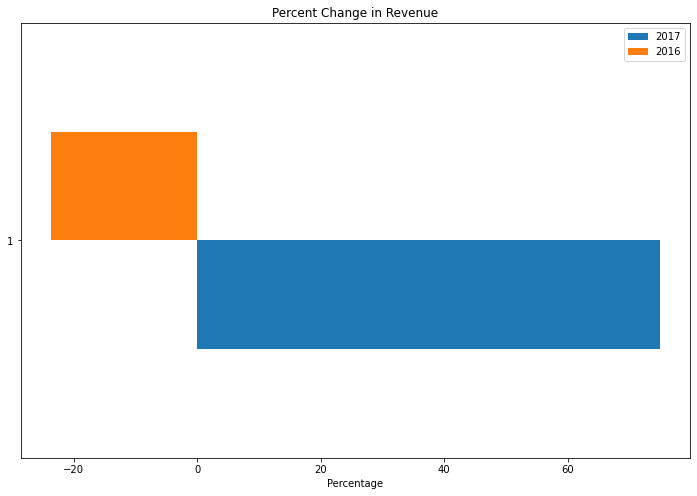

In [51]:
percent_growth.plot(kind='barh',figsize=(12,8))
plt.title('Percent Change in Revenue')
plt.xlabel('Percentage')

Revenue lost from attrition = $5686551.44

In [91]:
# Revenue lost from attrition = $5686551.44
(revenue_year[revenue_year['year']==2017]['Total Revenue'].sum()\
-revenue_year[revenue_year['year']==2016]['Total Revenue'] .sum())
#/\revenue_year[revenue_year['year']==2016]['Total Revenue'] .sum()


5686551.440000068

Existing Customer Revenue Current Year = $28676607.64

In [92]:
# Existing Customer Revenue Current Year = $28676607.64
result[result['year']==2017]['net_revenue'].sum()

28676607.640000004

Existing Customer Revenue Prior Year = $16397370.16

In [95]:
#Existing Customer Revenue Prior Year
result[result['year']==2016]['net_revenue'].sum()

16397370.160000004

Total Customers Current Year = 249987

In [113]:
# Total Customers Current Year
customer_current = cust_2017['customer_email'].value_counts().sum()
customer_current

249987

Total Customers Previous Year = 204646

In [115]:
# Total Customers Previous Year
customer_previous = cust_2016['customer_email'].value_counts().sum()
customer_previous 

204646

New Customers between 2017 and 2016 

In [118]:
# New Customers between 2017 and 2016
New_Customers_2017 = set(cust_2017.customer_email).difference(cust_2016.customer_email)
New_Customers_2017

{'uumerkdhfm@gmail.com',
 'dbiakxghui@gmail.com',
 'rmkfpxmpgr@gmail.com',
 'obkprxziya@gmail.com',
 'gjomrmrtzu@gmail.com',
 ' vqgcyhzztq@gmail.com',
 'xotchbazfh@gmail.com',
 ' pjhdsqwkwb@gmail.com',
 ' oevjxdylvq@gmail.com',
 'klkrqbjewe@gmail.com',
 ' intseisuid@gmail.com',
 ' osphgcyoib@gmail.com',
 'wxylypdtsq@gmail.com',
 'uueriexbax@gmail.com',
 ' kidbbyloyp@gmail.com',
 'arjrfvvzuj@gmail.com',
 'mdbzfufmgy@gmail.com',
 'oetuamteng@gmail.com ',
 ' yoclendwke@gmail.com',
 'aftcyflbft@gmail.com',
 'xqvzemmjtx@gmail.com',
 'lalgcepeuv@gmail.com',
 ' hlltmfgmmz@gmail.com',
 ' pumvnylevq@gmail.com',
 'jsppjhjvdd@gmail.com ',
 'wrinxrpuxv@gmail.com',
 ' hyynxnhmer@gmail.com',
 'qayifhqwnp@gmail.com',
 ' jndqiijupz@gmail.com',
 ' vwxqcgzams@gmail.com',
 ' gfmhfqqcqs@gmail.com',
 'vaqkakfvpm@gmail.com',
 'vulaujmwtp@gmail.com',
 ' rekyzrgzfj@gmail.com',
 'tnwvxpzoly@gmail.com',
 ' ozselthzhw@gmail.com',
 ' mpiygxgqmp@gmail.com',
 'mhyzrvrjid@gmail.com',
 'anhbvppquj@gmail.com',
 ' dddb

lost customers between 2017 and 2016

In [119]:
# lost customers between 2017 and 2016
lost_customer_2017 = set(cust_2016.customer_email).difference(cust_2017.customer_email)
lost_customer_2017

{'kdddeqkawn@gmail.com',
 'uqaarlfuix@gmail.com',
 'rkidwkgfkw@gmail.com',
 ' mgkdjtodaz@gmail.com',
 'inqwnsfhcg@gmail.com',
 'zitnihpxxn@gmail.com',
 'ynmlgfztkj@gmail.com',
 ' cdauqrgpyi@gmail.com',
 'sqklhykfnk@gmail.com',
 'uaxyjyntvz@gmail.com',
 ' kmrbpjzfwi@gmail.com',
 'fariiduzop@gmail.com',
 'rrruvwvflf@gmail.com',
 'fyquqvgirg@gmail.com ',
 ' tltlwnxnqd@gmail.com',
 'ezrijyijmh@gmail.com',
 ' qfgyenpwuu@gmail.com',
 'iwhsavkjtx@gmail.com',
 ' zwxpvdrjjw@gmail.com',
 ' mrvntikalt@gmail.com',
 'hvjczqlscw@gmail.com',
 'pgrbgnyvzi@gmail.com',
 ' homaebweah@gmail.com',
 'tkztenyfjk@gmail.com',
 ' uqvttveebx@gmail.com',
 'jeigqbakbi@gmail.com',
 'qmejnswyji@gmail.com',
 ' pbbibvoynx@gmail.com',
 'gigafhhboc@gmail.com ',
 'cjibomqftp@gmail.com ',
 ' kncyqeqnyi@gmail.com',
 'micjmivvcc@gmail.com',
 ' qbcppzkxzw@gmail.com',
 'iigbycmnzq@gmail.com',
 'jgxipflksc@gmail.com',
 'kbnbskhrzl@gmail.com',
 'ckfzbidwpv@gmail.com',
 'ohzjafqerc@gmail.com',
 ' feuosgjtyd@gmail.com',
 'xyeeiqn